# Assessement of stationarity

In [ ]:
import pandas as pd
import scipy as sc
import numpy as np 
from matplotlib import pyplot as plt

df_network_trajectory = pd.read_csv("./results/single_run/convergence of the ratio borrowing ov deposits - not convincing 0.3/df_network_trajectory.csv", index_col=0)

In [ ]:
def f_fit(x,a,b,tau):
    return a-b*np.exp(-x/tau)

def g_fit(x,a,b,tau=1):
    return a-b/(x*1.0)**(tau**2)

In [ ]:
fit = sc.optimize.curve_fit(g_fit, df_network_trajectory.index[500:], df_network_trajectory["borrowings ov. deposits tot. network"].iloc[500:], p0=[50.0,50.0,0.5], full_output=True)

In [ ]:
popt = fit[0]
popt

array([ 53.64488461, 224.98317121,   0.52191254])

(0.0, 50.0)

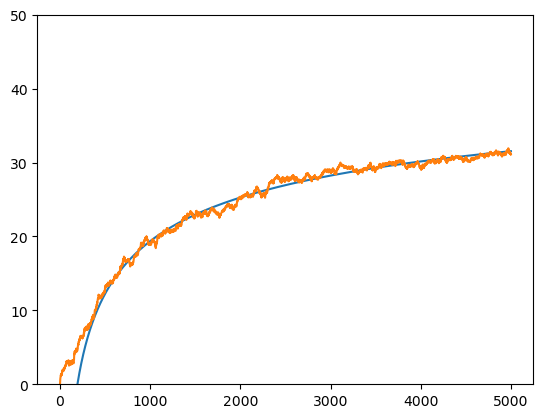

In [ ]:
plt.plot(df_network_trajectory.index, g_fit(df_network_trajectory.index, *popt))
plt.plot(df_network_trajectory.index, df_network_trajectory["borrowings ov. deposits tot. network"])
plt.ylim(0,50)

In [ ]:
def R2(y,ymodeled):
    return 1 - ((y-ymodeled)**2).sum() / (y**2).sum()

R2(df_network_trajectory["borrowings ov. deposits tot. network"].iloc[500:],g_fit(df_network_trajectory.index[500:], *popt))*100

99.95991316892501

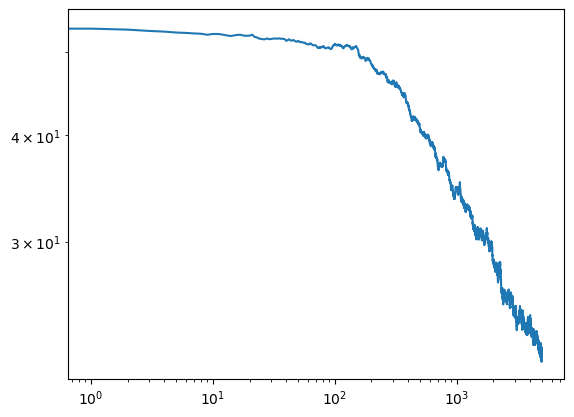

In [ ]:
# 50.881

sr_test = 53.64 - df_network_trajectory["borrowings ov. deposits tot. network"]
sr_test.plot()
plt.yscale("log")
plt.xscale("log")

# assess if transactions that last for a long time are the ones with a smaller size

In [19]:
import pandas as pd
import scipy as sc
import numpy as np 
from matplotlib import pyplot as plt
from tqdm import tqdm

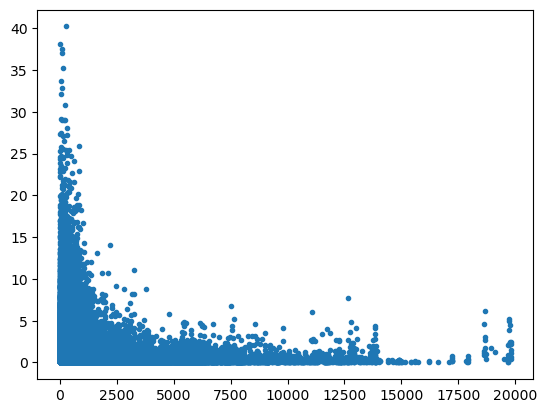

In [30]:
df_rev_repo_trans = pd.read_csv("./results/single_run/run2000_money_creation_decreasing_reuse/df_rev_repo_trans.csv", index_col=0) # survival_1
df_rev_repo_trans.fillna(20000,inplace=True)
df_rev_repo_trans["tenor"] = df_rev_repo_trans["end_step"] - df_rev_repo_trans["start_step"]
df = df_rev_repo_trans.loc[df_rev_repo_trans["status"]==False].copy()
plt.plot(df["tenor"],df["amount"],".")

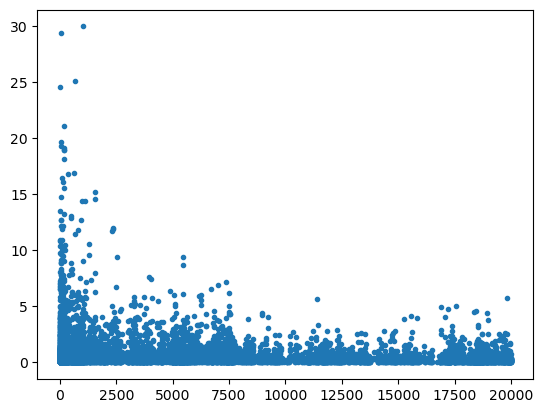

In [31]:
df_bar = df_rev_repo_trans.loc[df_rev_repo_trans["status"]].copy()
plt.plot(df_bar["tenor"],df_bar["amount"],".")

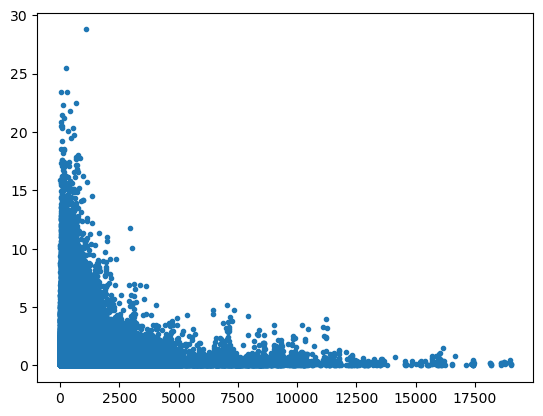

In [36]:
df_rev_repo_trans = pd.read_csv("./results/single_run/test/df_rev_repo_trans.csv", index_col=0)
df_rev_repo_trans.fillna(20000,inplace=True)
df_rev_repo_trans["tenor"] = df_rev_repo_trans["end_step"] - df_rev_repo_trans["start_step"]
df = df_rev_repo_trans.loc[df_rev_repo_trans["status"]==False].copy()
plt.plot(df["tenor"],df["amount"],".")

In [48]:
df_bar[df_bar["start_step"]==8]

,bank_id,trans_id,amount,start_step,end_step,status,tenor
owner_bank_id,,,,,,,
13,10,1,0.372188,8,20000.0,True,19992.0


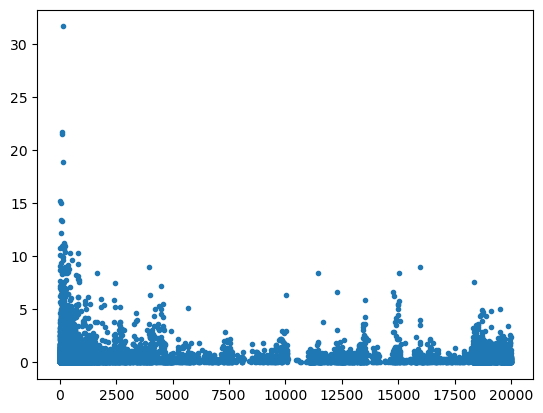

In [38]:
df_bar = df_rev_repo_trans.loc[df_rev_repo_trans["status"]].copy()
plt.plot(df_bar["tenor"],df_bar["amount"],".")

[]

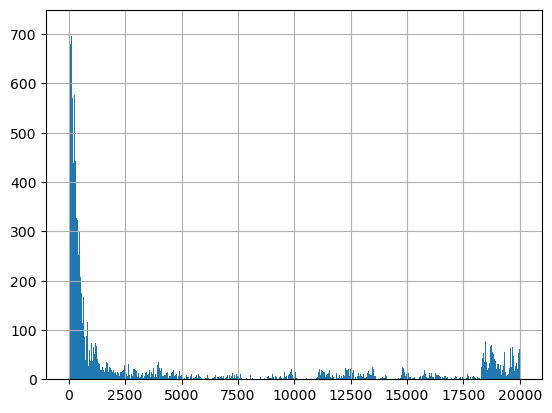

In [56]:
df_bar["tenor"].hist(bins=500).plot()

In [53]:
df_temp = df_bar["tenor"].copy()
df_temp.sort_values(inplace=True)
df_temp = df_temp.reset_index()
sr_survival_0 = pd.Series(index=range(int(df["tenor"].max())))
for i in tqdm(sr_survival_0.index):
    sr_survival_0.loc[i] = len(df) - len(df.loc[df["tenor"]<i])

/opt/tmp/tmp/ipykernel_8125/3722053164.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_survival_0 = pd.Series(index=range(int(df["tenor"].max())))
100%|██████████| 19020/19020 [02:15<00:00, 140.21it/s]


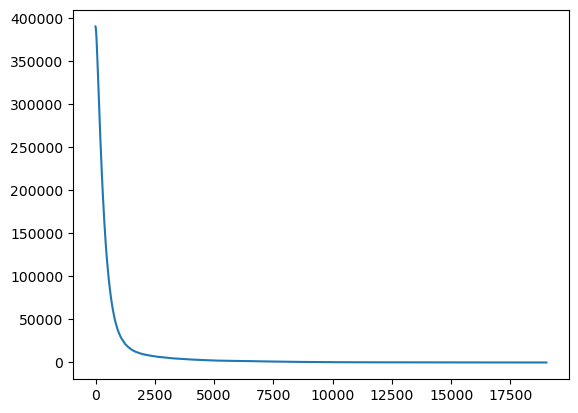

In [54]:
ax = sr_survival_0.plot()

# assessment of the decrease of maturitie

In [ ]:
import pandas as pd
import scipy as sc
import numpy as np 
from matplotlib import pyplot as plt
from tqdm import tqdm

df_rev_repo_trans = pd.read_csv("./results/single_run/slow_colat_reuse_decrease/df_rev_repo_trans.csv", index_col=0) # survival_1

# df_rev_repo_trans = pd.read_csv("./results/single_run/money_creation_all_statio_except_density/df_rev_repo_trans.csv", index_col=0)

# df_rev_repo_trans = pd.read_csv("./results/single_run/no_money_creation_colat_reuse_good_density/df_rev_repo_trans.csv", index_col=0) # survival

[]

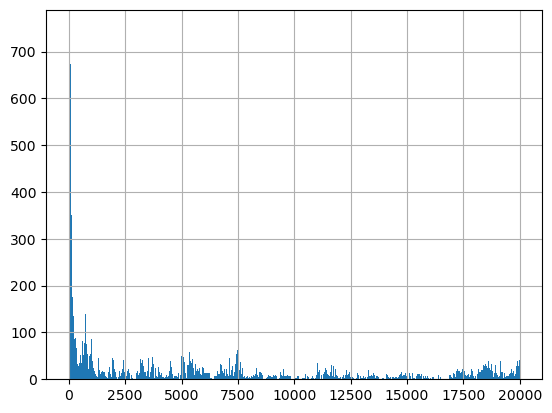

In [60]:
df_rev_repo_trans = pd.read_csv("./results/single_run/run2000_money_creation_decreasing_reuse/df_rev_repo_trans.csv", index_col=0) # survival_1
df_rev_repo_trans.fillna(20000,inplace=True)
df_rev_repo_trans["tenor"] = df_rev_repo_trans["end_step"] - df_rev_repo_trans["start_step"]
df = df_rev_repo_trans["tenor"].loc[df_rev_repo_trans["status"]==False].copy()
df_bar = df_rev_repo_trans["tenor"].loc[df_rev_repo_trans["status"]].copy()
# df.sort_values(inplace=True)
# df = df.reset_index()
# sr_survival_0 = pd.Series(index=range(int(df["tenor"].max())))
# for i in tqdm(sr_survival_0.index):
#     sr_survival_0.loc[i] = len(df) - len(df.loc[df["tenor"]<i])

df_bar.hist(bins=500).plot()

[]

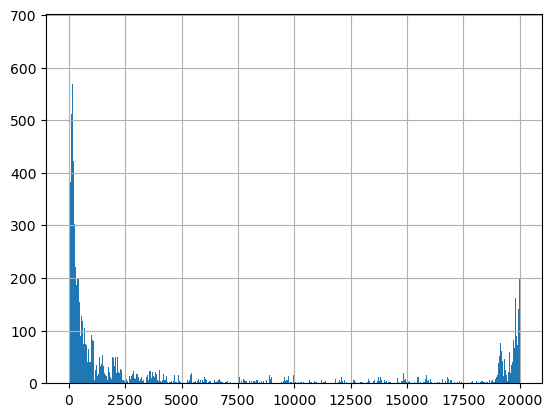

In [64]:
df_rev_repo_trans = pd.read_csv("./results/single_run/run2000_money_creation_all_statio_except_density/df_rev_repo_trans.csv", index_col=0) # survival_1
df_rev_repo_trans.fillna(20000,inplace=True)
df_rev_repo_trans["tenor"] = df_rev_repo_trans["end_step"] - df_rev_repo_trans["start_step"]
df = df_rev_repo_trans["tenor"].loc[df_rev_repo_trans["status"]==False].copy()
df_bar = df_rev_repo_trans["tenor"].loc[df_rev_repo_trans["status"]].copy()
# df.sort_values(inplace=True)
# df = df.reset_index()
# sr_survival_1 = pd.Series(index=range(int(df["tenor"].max())))
# for i in tqdm(sr_survival_1.index):
#     sr_survival_1.loc[i] = len(df) - len(df.loc[df["tenor"]<i])

df_bar.hist(bins=500).plot()

[]

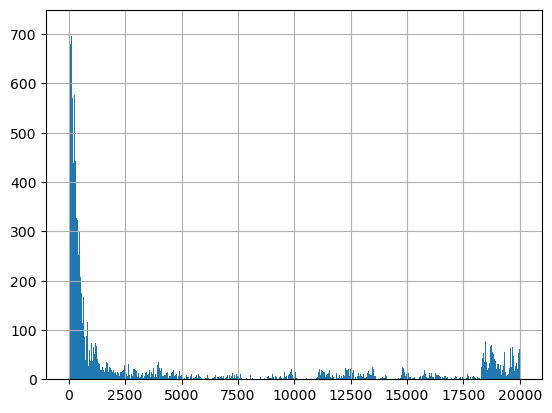

In [62]:
df_rev_repo_trans = pd.read_csv("./results/single_run/test/df_rev_repo_trans.csv", index_col=0) # survival
df_rev_repo_trans.fillna(20000,inplace=True)
df_rev_repo_trans["tenor"] = df_rev_repo_trans["end_step"] - df_rev_repo_trans["start_step"]
df = df_rev_repo_trans["tenor"].loc[df_rev_repo_trans["status"]==False].copy()
df_bar = df_rev_repo_trans["tenor"].loc[df_rev_repo_trans["status"]].copy()
# df.sort_values(inplace=True)
# df = df.reset_index()
# sr_survival_2 = pd.Series(index=range(int(df["tenor"].max())))
# for i in tqdm(sr_survival_2.index):
#     sr_survival_2.loc[i] = len(df) - len(df.loc[df["tenor"]<i])

df_bar.hist(bins=500).plot()

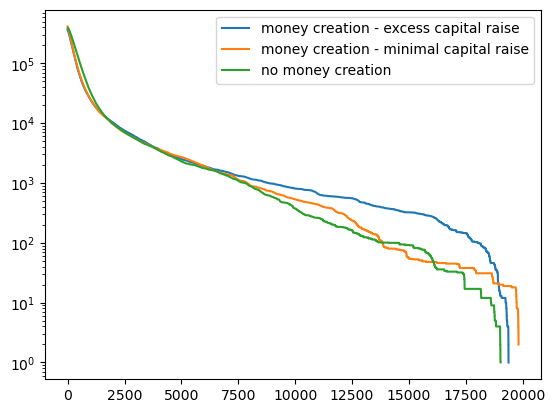

In [16]:
ax = sr_survival_1.loc[0:].plot()
sr_survival_0.loc[0:].plot(ax= ax)
sr_survival_2.loc[0:].plot(ax= ax)
ax.legend(["money creation - excess capital raise", "money creation - minimal capital raise", "no money creation"])
ax.set_yscale("log")
# ax.set_xscale("log")

In [ ]:
def sur_fit_exp(index,a,b,tau):
    return a + b*np.exp(-index/tau)

def sur_fit_power(x,a,b,tau=1):
    return a + b/x**tau

In [ ]:
n_start = 1000

fit = sc.optimize.curve_fit(sur_fit_power, sr_survival_1.index[n_start:], sr_survival_1.iloc[n_start:], p0=[1,1,1], full_output=True)
popt = fit[0]
popt

array([-1.67550760e+03,  1.30265678e+05,  5.14953179e-01])

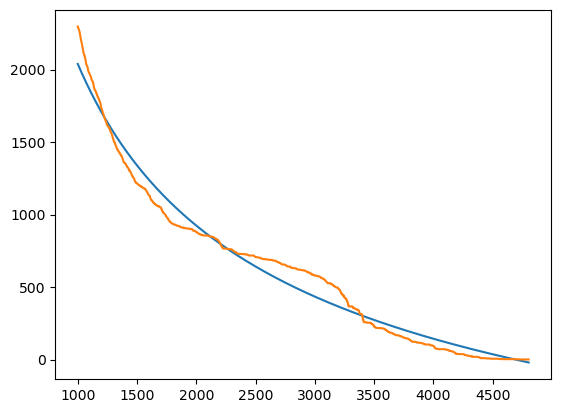

In [ ]:
plt.plot(sr_survival_1.index[n_start:], sur_fit_power(sr_survival_1.index[n_start:], *popt))
plt.plot(sr_survival_1.index[n_start:], sr_survival_1.iloc[n_start:])

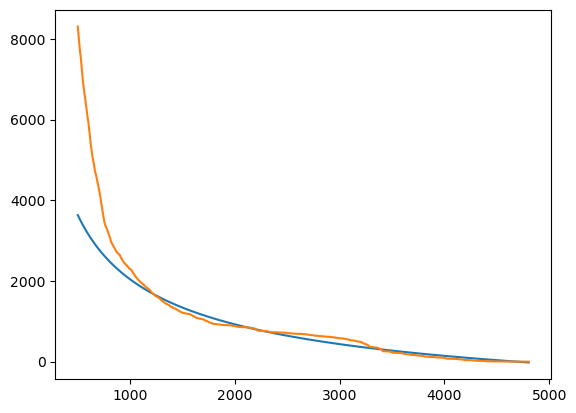

In [ ]:
n_start = 500
plt.plot(sr_survival_1.index[n_start:], sur_fit_power(sr_survival_1.index[n_start:], *popt))
plt.plot(sr_survival_1.index[n_start:], sr_survival_1.iloc[n_start:])

# assessment of the repo size

In [ ]:
import pandas as pd
import scipy as sc
import numpy as np 
from matplotlib import pyplot as plt
from tqdm import tqdm

df_rev_repo_trans = pd.read_csv("./results/single_run/test/df_rev_repo_trans.csv", index_col=[0,1,2]) # survival_1

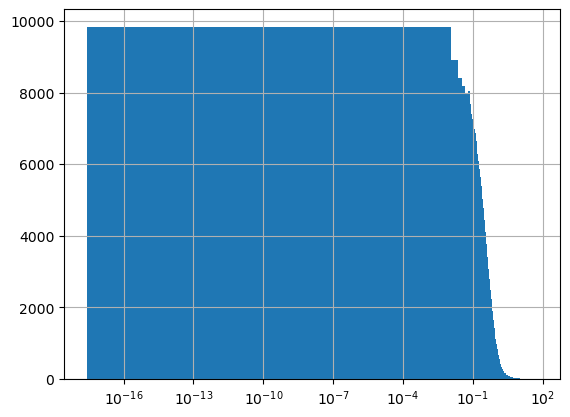

In [ ]:
df_rev_repo_trans["amount"].hist(bins=5000).plot()
plt.xscale("log")

In [ ]:
arr_rev_repo_exp_adj[100,4,5]


0.0

In [ ]:
import emp_preprocessing as ep
import parameters as par
import emp_metrics as em

min_repo_trans_size = 1e-6
nb_steps = 20000
arr_rev_repo_exp_adj = np.zeros(
            (nb_steps+1, nb_banks, nb_banks),
            dtype=np.float32,
        )

for index, row in tqdm(df_rev_repo_trans.iterrows()):

            # get the tenor (fill by current step if tenor is empty)
            if np.isnan(row["end_step"]):
                tenor = nb_steps - row["start_step"]
            else:
                tenor = int(row["end_step"]) - row["start_step"]

            # add the amont of the transaction over its tenor
            for step in range(
                row["start_step"], row["start_step"] + tenor + 1
            ):
                arr_rev_repo_exp_adj[step, index[0], index[1]] += row[
                    "amount"
                ]


arr_binary_adj = ep.fast_build_arr_binary_adj(
            arr_rev_repo_exp_adj,
            np.array(par.agg_periods),
            nb_steps,
            min_repo_trans_size,
        )

dic_arr_binary_adj = {}
for agg_period in par.agg_periods:
    dic_arr_binary_adj.update(
        {
            agg_period: np.zeros(
                (
                    nb_steps,
                    Network.nb_banks,
                    Network.nb_banks,
                )
            )
        }
    )

for period_nb, agg_period in enumerate(par.agg_periods):
            # convert array results to dictionaries
            dic_arr_binary_adj[agg_period] = arr_binary_adj[period_nb]

df_density = em.get_density(
            dic_arr_binary_adj, range(nb_steps)
        )

373554it [12:36, 493.79it/s] 


get density


100%|██████████| 19999/19999 [00:03<00:00, 5196.02it/s]


<AxesSubplot: >

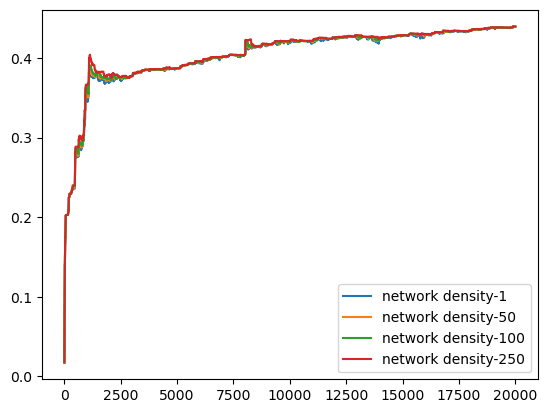

In [ ]:
df_density.plot()

get density


100%|██████████| 19999/19999 [00:03<00:00, 5182.86it/s]


<AxesSubplot: >

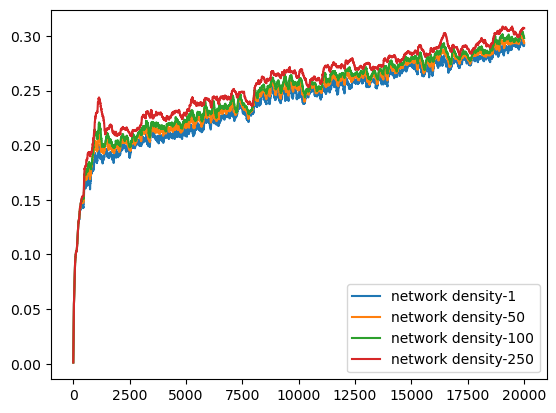

In [ ]:
min_repo_trans_size = 1

arr_binary_adj = ep.fast_build_arr_binary_adj(
            arr_rev_repo_exp_adj,
            np.array(par.agg_periods),
            nb_steps,
            min_repo_trans_size,
        )

dic_arr_binary_adj = {}
for agg_period in par.agg_periods:
    dic_arr_binary_adj.update(
        {
            agg_period: np.zeros(
                (
                    nb_steps,
                    Network.nb_banks,
                    Network.nb_banks,
                )
            )
        }
    )

for period_nb, agg_period in enumerate(par.agg_periods):
            # convert array results to dictionaries
            dic_arr_binary_adj[agg_period] = arr_binary_adj[period_nb]

df_density = em.get_density(
            dic_arr_binary_adj, range(nb_steps)
        )

df_density.plot()

get density


100%|██████████| 19999/19999 [00:03<00:00, 5182.08it/s]


<AxesSubplot: >

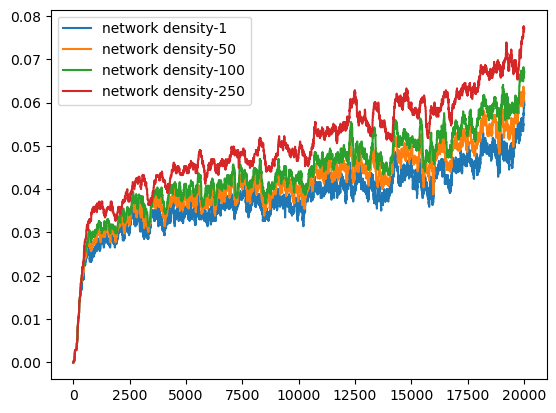

In [ ]:
min_repo_trans_size = 15

arr_binary_adj = ep.fast_build_arr_binary_adj(
            arr_rev_repo_exp_adj,
            np.array(par.agg_periods),
            nb_steps,
            min_repo_trans_size,
        )

dic_arr_binary_adj = {}
for agg_period in par.agg_periods:
    dic_arr_binary_adj.update(
        {
            agg_period: np.zeros(
                (
                    nb_steps,
                    Network.nb_banks,
                    Network.nb_banks,
                )
            )
        }
    )

for period_nb, agg_period in enumerate(par.agg_periods):
            # convert array results to dictionaries
            dic_arr_binary_adj[agg_period] = arr_binary_adj[period_nb]

df_density = em.get_density(
            dic_arr_binary_adj, range(nb_steps)
        )

df_density.plot()

In [1]:
test = False

test += "dingo"

test += "ca"

test

TypeError: unsupported operand type(s) for +=: 'bool' and 'str'

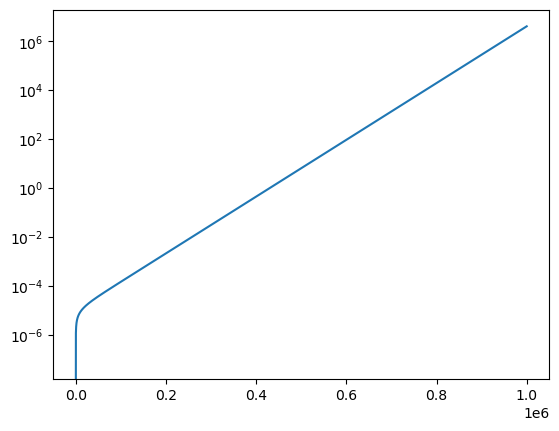

In [4]:
import numpy as np
from matplotlib import pyplot as plt
T = 1000000
g=1e-3
std_control = 2
nb_banks= 1e5
gamma = g**2*np.exp(std_control**2) + 2*g+1
A = gamma/(g+1)**2
plt.plot(range(T),[(np.sqrt(A**t - 1)/nb_banks) for t in range(T)])
plt.yscale("log")

/opt/tmp/tmp/ipykernel_144138/172879122.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_mean = pd.Series()
/opt/tmp/tmp/ipykernel_144138/172879122.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_var =pd.Series()
/opt/tmp/tmp/ipykernel_144138/172879122.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_sum = pd.Series()
/opt/tmp/tmp/ipykernel_144138/172879122.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_min = pd.Series()
  1%|          | 7930/1000000 [00:44<1:32:02, 179.64it/s]


KeyboardInterrupt: 

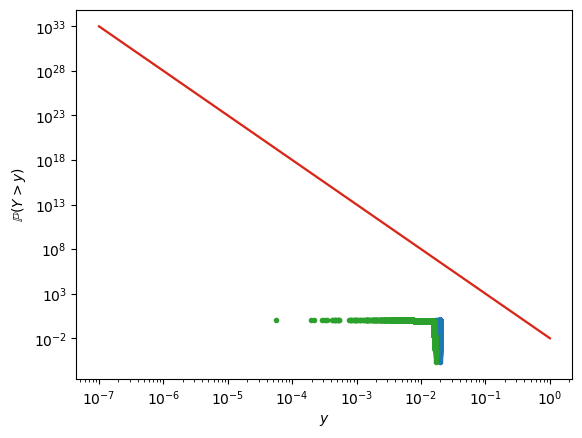

In [37]:

import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os


sr_mean = pd.Series()
sr_var =pd.Series()
sr_sum = pd.Series()
sr_min = pd.Series()
df_current_money = pd.DataFrame()

# Teted conditions
T = 1000000
nb_banks = int(5e4)
init_money = 2e-2
init_money_min = 4/5*init_money
ar_current_money = np.ones(nb_banks)*init_money
df_money = pd.DataFrame(columns=range(nb_banks))


g = -0.02/250
new_loans_vol = 100
sr_money_min = pd.Series([np.exp(g*t) for t in range(T)])*init_money_min
# mu = g -0.5*new_loans_vol**2

path = "test_with_min_2"

fct.delete_n_init_path(f"./results/power_law/{path}/")

for t in tqdm(range(T)):
    
    # generate lognormal shock
    std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
    mean_control = -0.5 * std_control**2
    ar_shock = (np.random.lognormal(mean=mean_control,sigma=std_control,size=nb_banks))*g
    
    # # no min size
    # ar_current_money = ar_current_money +  ar_shock*ar_current_money
    
    # loans > min size
    index_normal =  np.where(ar_current_money>=init_money_min)[0]
    ar_current_money[index_normal] = ar_current_money[index_normal] +  ar_shock[index_normal]*ar_current_money[index_normal]
    
    # loans < min size
    index_min =  np.where(ar_current_money<init_money_min)[0]
    ar_current_money[index_min] = ar_current_money[index_min] + np.maximum(ar_shock[index_min],0)*ar_current_money[index_min]
    
    sr_mean.loc[t] = np.mean(ar_current_money)
    sr_var.loc[t] = np.var(ar_current_money)
    sr_sum.loc[t] = np.sum(ar_current_money)
    sr_min.loc[t] = np.min(ar_current_money)
    # df_money.loc[t] = ar_current_money
    
    if t%5000 == 0:
        df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money)})
        df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)
        df_ccdf.to_csv(f"./results/power_law/{path}/{t}_df_ccdf.csv")
        
        plt.plot(df_ccdf["data"],df_ccdf["rank"],".")
        plt.yscale("log")
        plt.xscale("log")
        index = np.logspace(-7,0)
        plt.plot(index, [1e-2/x**5 for x in index], "-")
        plt.ylabel(r"$\mathbb{P}(Y > y)$")
        plt.xlabel(r"$y$")
        plt.savefig(f"./results/power_law/{path}/{t}_power_law.png")
        
        
        
        


Text(0.5, 0, '$y$')

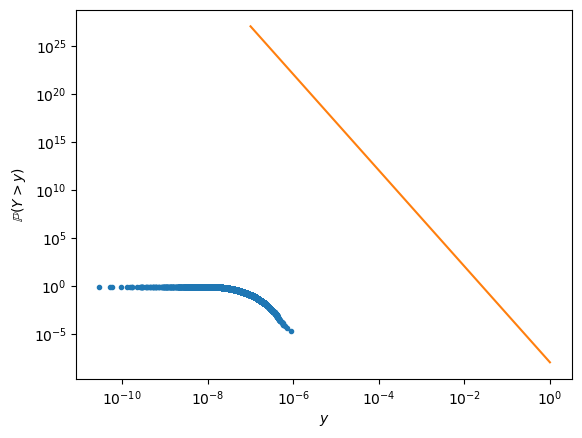

In [35]:
df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money)})
df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)

plt.plot(df_ccdf["data"],df_ccdf["rank"],".")
plt.yscale("log")
plt.xscale("log")
index = np.logspace(-7,0)
plt.plot(index, [1e-8/x**5 for x in index], "-")
plt.ylabel(r"$\mathbb{P}(Y > y)$")
plt.xlabel(r"$y$")

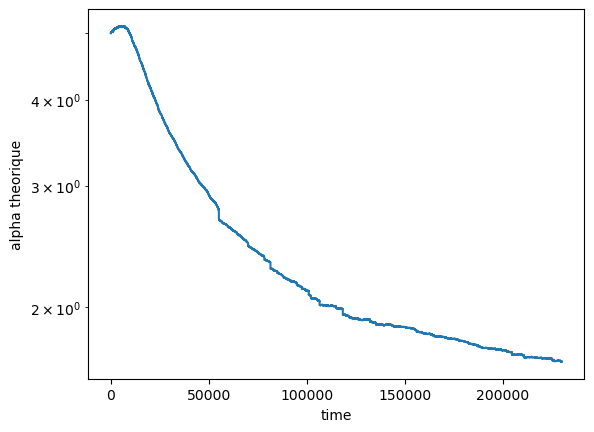

In [9]:
sr_alpha = 1/(1-sr_money_min/sr_mean)
sr_alpha.plot()
plt.ylabel("alpha theorique")
plt.xlabel("time")
plt.yscale("log")

In [21]:
sr_alpha.dropna().iloc[-1]

1.665171966473758

<AxesSubplot: >

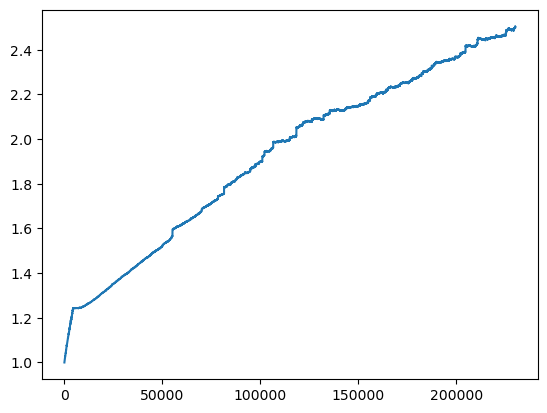

In [32]:
(sr_mean/sr_min).plot()

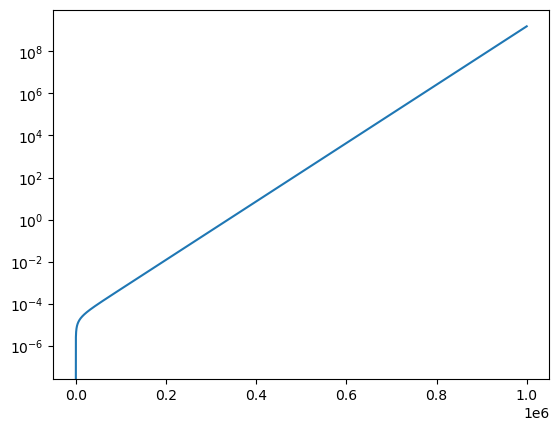

In [29]:
gamma = g**2*np.exp(std_control**2) + 2*g+1
A = gamma/(g+1)**2
plt.plot(range(T),[(np.sqrt(A**t - 1)/nb_banks) for t in range(T)])
plt.yscale("log")

# stationary of random growth model

/opt/tmp/tmp/ipykernel_144138/2126244404.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_mean = pd.Series()
/opt/tmp/tmp/ipykernel_144138/2126244404.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_var =pd.Series()
/opt/tmp/tmp/ipykernel_144138/2126244404.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_sum = pd.Series()
/opt/tmp/tmp/ipykernel_144138/2126244404.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_min = pd.Series()
100%|██████████| 100000/100000 [6:16:02<00:00,  4.43it/s]   


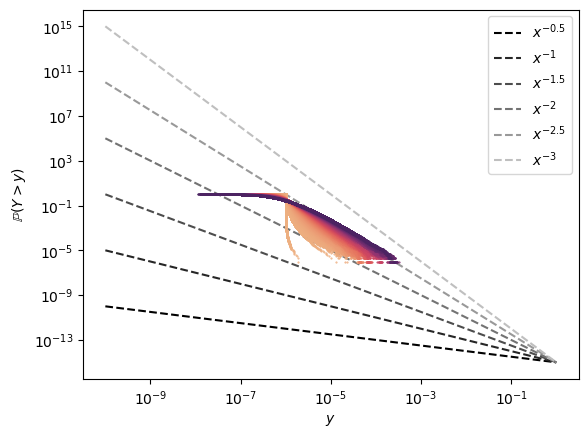

In [47]:
sr_mean = pd.Series()
sr_var =pd.Series()
sr_sum = pd.Series()
sr_min = pd.Series()
df_current_money = pd.DataFrame()

# Teted conditions
T = int(1e5)
nb_banks = int(1e6)
init_money_min = 1e-2
ar_current_money = np.ones(nb_banks)*init_money_min
df_money = pd.DataFrame(columns=range(nb_banks))

g = 0.10/250
new_loans_vol = 10
sr_money_min = pd.Series([np.exp(g*t) for t in range(T)])*init_money_min
# mu = g -0.5*new_loans_vol**2

path = "test_reel_100000_banks_vol_10_g_10percent_year"

fct.delete_n_init_path(f"./results/power_law/{path}/")

index = np.logspace(-10,0)
ref= 1e-15
plt.plot(index, [ref/x**0.5 for x in index], "--",color="0",)
plt.plot(index, [ref/x**1 for x in index], "--",color="0.15")
plt.plot(index, [ref/x**1.5 for x in index], "--",color="0.30")
plt.plot(index, [ref/x**2 for x in index], "--",color="0.45")
plt.plot(index, [ref/x**2.5 for x in index], "--",color="0.60")
plt.plot(index, [ref/x**3 for x in index], "--",color="0.75")
plt.legend([r"$x^{-0.5}$",r"$x^{-1}$",r"$x^{-1.5}$",r"$x^{-2}$",r"$x^{-2.5}$",r"$x^{-3}$"])

colors = sns.color_palette("flare", n_colors=len(range(0,T,500)))
i = 0
for t in tqdm(range(T)):
    
    # generate lognormal shock
    std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
    mean_control = -0.5 * std_control**2
    ar_shock = (np.random.lognormal(mean=mean_control,sigma=std_control,size=nb_banks))*g
    
    ar_current_money = ar_current_money +  ar_shock*ar_current_money
    

    sr_mean.loc[t] = np.mean(ar_current_money)
    sr_var.loc[t] = np.var(ar_current_money)
    sr_sum.loc[t] = np.sum(ar_current_money)
    sr_min.loc[t] = np.min(ar_current_money)
    # df_money.loc[t] = ar_current_money
    
    if t%500 == 0:
        df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money/np.sum(ar_current_money))})
        df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)
        df_ccdf.to_csv(f"./results/power_law/{path}/{t}_df_ccdf.csv")
        plt.plot(df_ccdf["data"],df_ccdf["rank"],".",color=colors[i], markersize=1)
        plt.yscale("log")
        plt.xscale("log")
        plt.ylabel(r"$\mathbb{P}(Y > y)$")
        plt.xlabel(r"$y$")
        plt.savefig(f"./results/power_law/{path}/{t}_power_law.png")
        i+=1


100%|██████████| 200/200 [01:51<00:00,  1.80it/s]


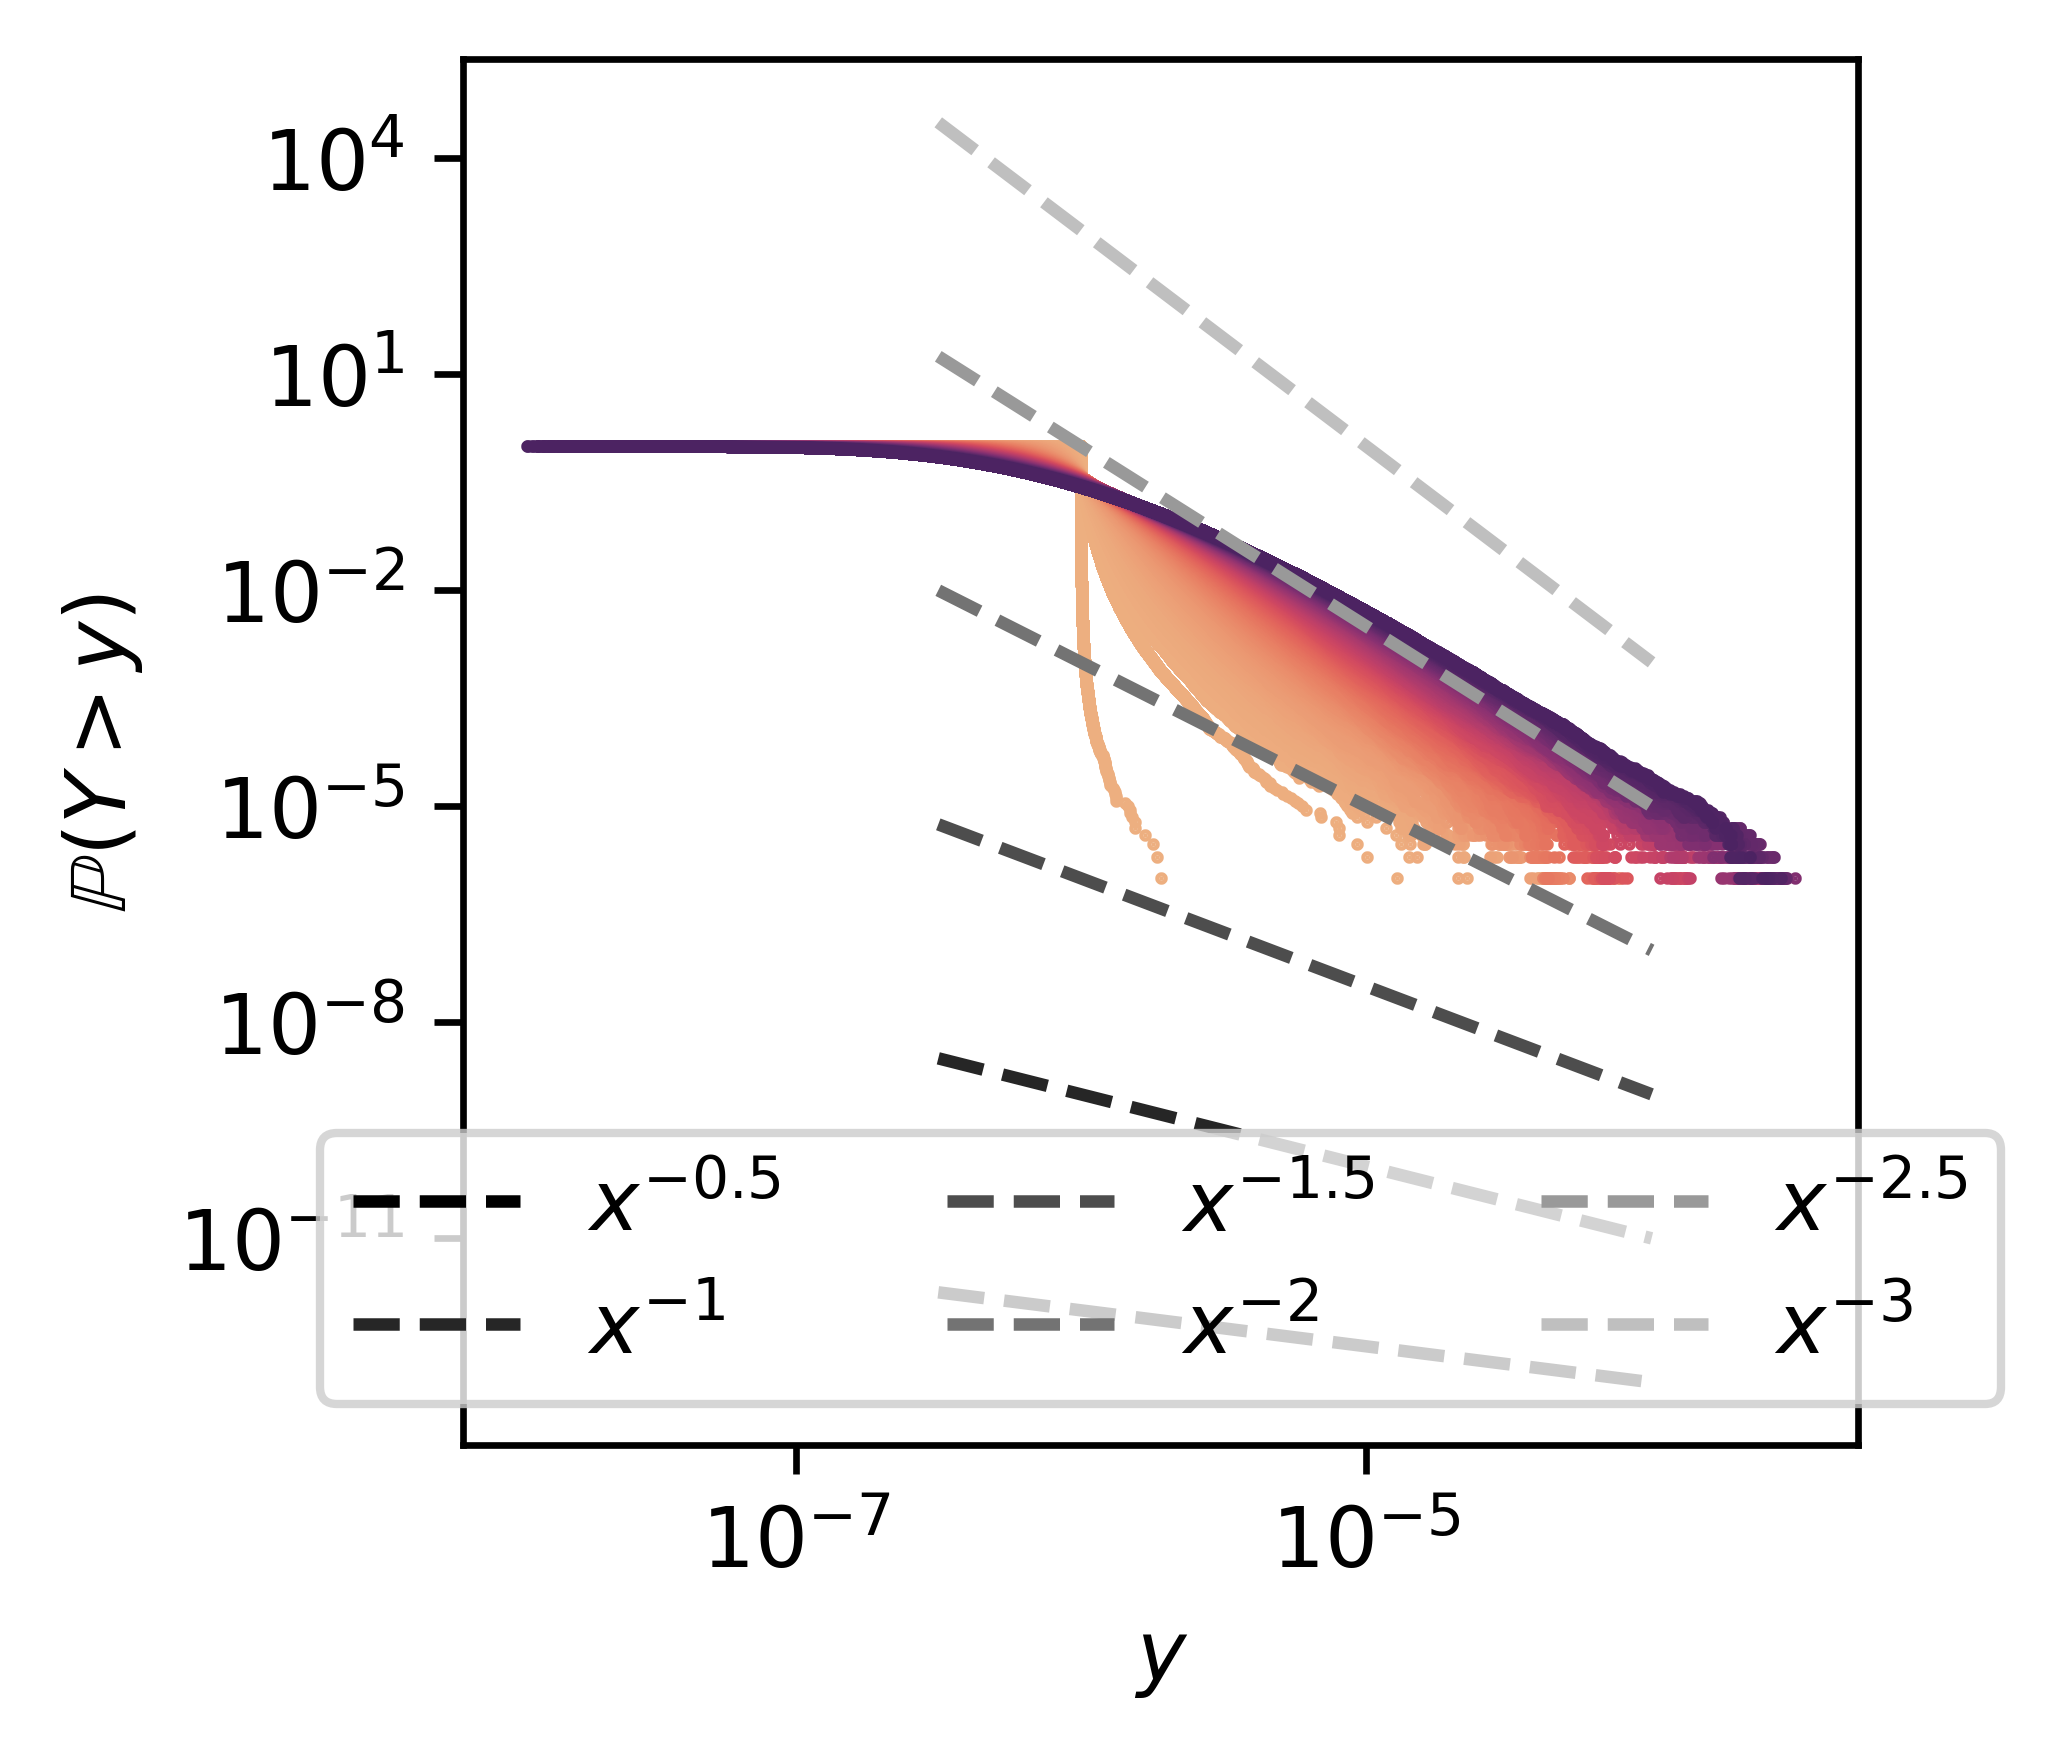

In [3]:
import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os


# Teted conditions
T = int(1e5)
nb_banks = int(1e6)
init_money_min = 1e-2

fig, ax = plt.subplots(figsize=(3,3), dpi=600)
index = np.logspace(-6.5,-4)



colors = sns.color_palette("flare", n_colors=len(range(0,T,500)))

path = "data_1m_banks_vol_10_g_10percent_year"

# os.makedirs("./results/power_law/charts_1m_banks_vol_10_g_10percent_year/",exist_ok=True)

for i, t in enumerate(tqdm(range(0,T,500))):
        try:
            df_ccdf = pd.read_csv(f"./results/power_law/{path}/{t}_df_ccdf.csv")
        except:
            pass
        
        plt.plot(df_ccdf["data"],df_ccdf["rank"],".",color=colors[i], markersize=1, label='_nolegend_')
        plt.yscale("log")
        plt.xscale("log")
        plt.ylabel(r"$\mathbb{P}(Y > y)$")
        plt.xlabel(r"$y$")
        # plt.savefig(f"./results/power_law/charts_100000_banks_vol_10_g_10percent_year/{t}_stationarity_random_growth.png", bbox_inches="tight")
        
        
ref= 1e-15
plt.plot(index, [ref/x**0.5 for x in index], "--",color="0",)
plt.plot(index, [ref/x**1 for x in index], "--",color="0.15")
plt.plot(index, [ref/x**1.5 for x in index], "--",color="0.30")
plt.plot(index, [ref/x**2 for x in index], "--",color="0.45")
plt.plot(index, [ref/x**2.5 for x in index], "--",color="0.60")
plt.plot(index, [ref/x**3 for x in index], "--",color="0.75")
plt.legend([r"$x^{-0.5}$",r"$x^{-1}$",r"$x^{-1.5}$",r"$x^{-2}$",r"$x^{-2.5}$",r"$x^{-3}$"], 
           loc="lower center",
        # bbox_to_anchor=(1.0, 1.0),
        ncols=3
           )

plt.savefig(f"./results/article_plots/stationarity_random_growth_1m_banks_vol_10_g_10_dpi_600.png", bbox_inches="tight")